In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Carregando o conjunto de dados e exibindo os 10 primeirios
dados = pd.read_csv('dataset.csv')
dados.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [3]:
# Número de linhas e colunas
dados.shape

(9700, 11)

### Análise Exploratória

In [5]:
# Verificando o tipo de dados de cada coluna
dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [6]:
# Resumo estatístico do Valor_Venda
dados['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [7]:
# Verificando se há registros duplicados
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [8]:
# Verificando se há valores ausentes e se sim, quantos por registro
dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

Pergunta de Negócio 1:<br>
Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [9]:
# Primeiro vamos filtrar o dataframe com os registros da categoria que desejamos
dados_1 = dados[dados['Categoria'] == 'Office Supplies']

In [10]:
# Em seguida agrupamos por cidade e calculamos o total de valor_venda
dados_1_total = dados_1.groupby('Cidade')['Valor_Venda'].sum()

In [11]:
# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = dados_1_total.idxmax()
print(f"Cidade com maior valor de vendas para 'Office Supplies': {cidade_maior_venda}")

Cidade com maior valor de vendas para 'Office Supplies':New York City


In [12]:
# Conferindo o resultado
dados_1_total.sort_values(ascending=False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [14]:
# Calculamos o total de vendas para cada data de pedido
dados_2 = dados.groupby('Data_Pedido')['Valor_Venda'].sum()

In [15]:
dados_2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

Obs: Estamos aqui tratando data de pedido como variável categórica e não como série temporal. Se a pergunta fosse "ao longo do tempo" essa resposta não seria a ideal.

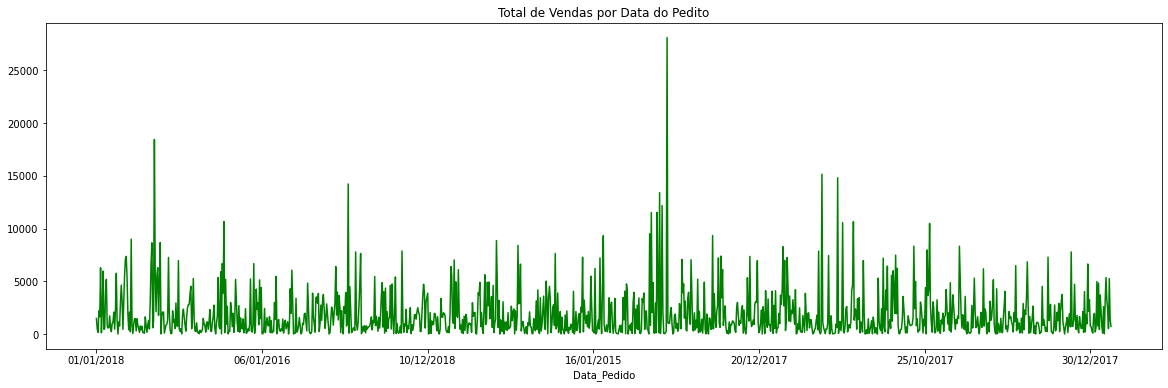

In [16]:
# Plotando em um gráfico
plt.figure(figsize=(20, 6))
dados_2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color='g')
plt.title('Total de Vendas por Data do Pedito')
plt.show();

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras

In [17]:
# Agrupamos por estado e calculamos o total de venda
dados_3 = dados.groupby('Estado')['Valor_Venda'].sum().reset_index()

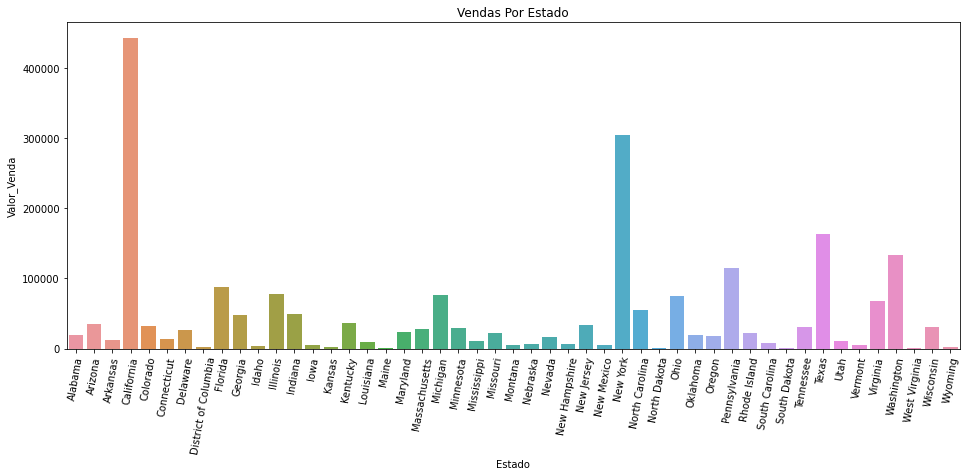

In [19]:
# Plotano o gráfico
plt.figure(figsize = (16, 6))
sns.barplot(data = dados_3, 
            y = 'Valor_Venda', 
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.